<a href="https://colab.research.google.com/github/Vaibhavgoel123/Artificial-Intelligence/blob/Pytorch/Imageclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using PyTorch

## Import Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

## Data Preprocessing

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3801,))
])

## Load MNIST Data

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.94MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 130kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.16MB/s]


## Create Data Loaders

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

## Creating Model

In [ ]:
class MNISTClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.layer = nn.Sequential(
        nn.Linear(784, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )

  def forward(self, X):
    X = self.flatten(X)
    X = self.layer(X)
    return X

## Model initialization and device management

In [ ]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using: {device}")

# Intialize model and its device
model = MNISTClassifier().to(device)

# Loss function and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Using: cpu


## Model Training

In [ ]:
def train_epoch(model, train_loader, loss_function, optimizer, device):
  model.train()
  total = 0
  correct = 0
  running_loss = 0.0

  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)

    optimizer.zero_grad()
    output = model(data)
    loss = loss_function(output, target)
    loss.backward()
    optimizer.step()

    #Tracking Progress
    running_loss += loss.item()
    _, predicted = output.max(1)
    total += target.size(0)
    correct += predicted.eq(target).sum().item()

    #Print every 100 batch
    if batch_idx % 100 == 0 and batch_idx > 0:
      avg_loss = running_loss/100
      accuracy = 100. * correct/total
      print(f'[{batch_idx*64}/{60000}]'
      f'Loss: {avg_loss:.3f} | Accuracy: {accuracy:.1f}')
      running_loss = 0.0

## Model Evaluation

In [ ]:
def evaluation(model, test_loader, device):
  model.eval()
  total = 0
  correct = 0

  with torch.no_grad():
    for input, targets in test_loader:
      input, targets = input.to(device), targets.to(device)

      outputs = model(input)
      _,predicted = outputs.max(1)

      total += targets.size(0)
      correct += predicted.eq(targets).sum().item()
  return 100. * correct/total

## Putting All Together

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
  print(f'\nEpoch: {epoch+1}')
  train_epoch(model, train_loader, loss_function, optimizer, device)
  accuracy = evaluation(model, test_loader, device)
  print(f'Test Accuracy: {accuracy:.2f}%')


Epoch: 1
[6400/60000]Loss: 0.146 | Accuracy: 95.8
[12800/60000]Loss: 0.127 | Accuracy: 96.0
[19200/60000]Loss: 0.146 | Accuracy: 95.9
[25600/60000]Loss: 0.112 | Accuracy: 96.1
[32000/60000]Loss: 0.124 | Accuracy: 96.2
[38400/60000]Loss: 0.114 | Accuracy: 96.2
[44800/60000]Loss: 0.102 | Accuracy: 96.4
[51200/60000]Loss: 0.114 | Accuracy: 96.4
[57600/60000]Loss: 0.099 | Accuracy: 96.5
Test Accuracy: 96.67%

Epoch: 2
[6400/60000]Loss: 0.082 | Accuracy: 97.5
[12800/60000]Loss: 0.077 | Accuracy: 97.7
[19200/60000]Loss: 0.084 | Accuracy: 97.6
[25600/60000]Loss: 0.090 | Accuracy: 97.5
[32000/60000]Loss: 0.088 | Accuracy: 97.4
[38400/60000]Loss: 0.098 | Accuracy: 97.4
[44800/60000]Loss: 0.091 | Accuracy: 97.3
[51200/60000]Loss: 0.077 | Accuracy: 97.4
[57600/60000]Loss: 0.077 | Accuracy: 97.4
Test Accuracy: 97.17%

Epoch: 3
[6400/60000]Loss: 0.068 | Accuracy: 98.0
[12800/60000]Loss: 0.062 | Accuracy: 98.0
[19200/60000]Loss: 0.060 | Accuracy: 98.1
[25600/60000]Loss: 0.062 | Accuracy: 98.0
[3200

In [23]:
import matplotlib.pyplot as plt


In [22]:
train_dataset[0]

(tensor([[[-0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439,
           -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439,
           -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439,
           -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439],
          [-0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439,
           -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439,
           -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439,
           -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439],
          [-0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439,
           -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439,
           -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439,
           -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439],
          [-0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439, -0.3439,
           -0.3439, -0.3439, -0.343

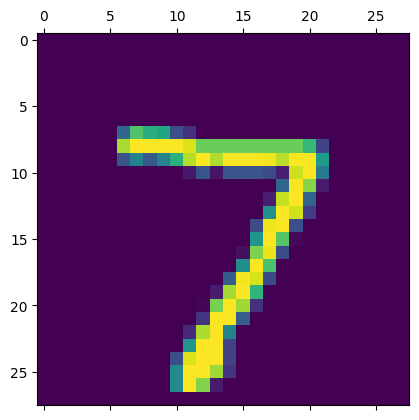

In [26]:
plt.matshow(test_dataset[0][0].squeeze())
plt.show()


## Make Predictions

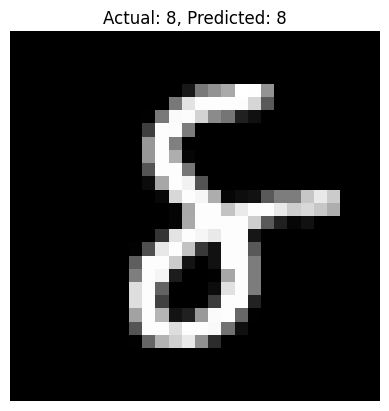

In [41]:
import random

# Get a random image and label from the test dataset
index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[index]

# Move image to the device (CPU/GPU) and add a batch dimension
image_for_prediction = image.unsqueeze(0).to(device)

# Make prediction
model.eval() # Set model to evaluation mode
with torch.no_grad():
    output = model(image_for_prediction)
    _, predicted = torch.max(output.data, 1)

predicted_label = predicted.item()

# Display the image and prediction
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Actual: {label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()